#  Metadata 
**Author:** Aman Sah
**Date:** 2023-12-11

This below code, is a summary of obstacle Visualization and Custom Way Navigation using Integrated LiDAR sensor. This draft report is subjected to copyright of IIT KANPUR. 

Mr.Aman Sah 
Department of Aerospace engineering
IIT Kanpur.

Email: amansah22@iitk.ac.in \
Email_2 : amansah1717@gmail.com\
Github : https://github.com/AmanSah17  \
Linkedin : https://www.linkedin.com/in/aman-sah-8a320b14b/ 



# ONE FACE OF THE HOUSE

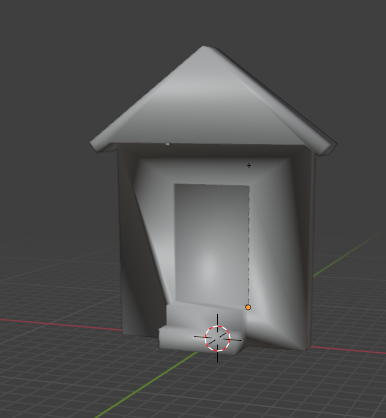

In [29]:
from IPython.display import Image

# Specify the path to your image file
image_path = "C:\\Users\\amans\\Downloads\\object_blender.png"

# Display the image
Image(filename=image_path)


# INTRODUCTION

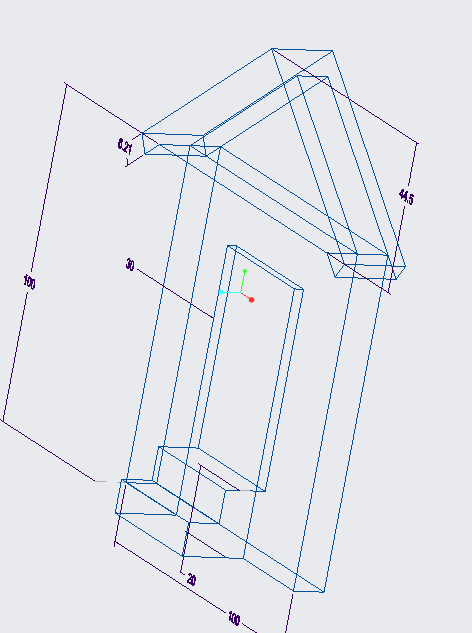

In [30]:
Image("C:\\Users\\amans\\Downloads\\wireframe_face.png")

In the realm of three-dimensional modeling and simulation, the integration of real-world 
data into virtual environments poses a unique set of challenges and opportunities. One 
such challenge arises in the context of importing complex architectural structures, such as 
house.obj files, into modeling software like Blender. These files typically encompass 
intricate geometries comprising multiple faces, edges, and distinct components like 
windows and doors. 
To address this intricate challenge, leveraging LiDAR (Light Detection and Ranging) 
sensor data becomes paramount. Through meticulous preprocessing of the acquired x, y, z 
coordinate data derived from LiDAR scans, a precise representation of a specific side of 
the house is obtained. This side is characterized by a planar wall featuring notable 
architectural elements, such as a door situated at a distinct depth and x-y coordinate. 
The ensuing step involves the calculation of an exact path based on the processed LiDAR 
data. This path is meticulously designed to navigate and accurately visit predefined 
waypoints on the planar wall, ensuring comprehensive coverage. The ultimate objective is 
to employ this data-driven approach not only for visualization but also for a practical 
application – the precise painting of the planar wall in the virtual environment. 
As a trained data professional, this intersection of real-world sensor data, geometric 
preprocessing, and meticulous path planning represents a convergence of expertise in 
both data science and three-dimensional modeling. The successful amalgamation of these 
disciplines holds the promise of enhancing the accuracy and realism of virtual 
representations, opening avenues for innovative applications in fields ranging from 
architecture to immersive simulations. 

# Step 2: LiDAR Integration 
LiDAR, or Light Detection and Ranging, operates by emitting laser pulses towards a target 
area. These pulses interact with surfaces, and the sensor measures the time it takes for the 
emitted light to return after reflection. By precisely timing this round-trip, LiDAR 
calculates the distance to the reflecting object with exceptional accuracy. To achieve 
ranging detection, LiDAR projects a plane of laser beams towards the target area. The 
beams strike surfaces and bounce back, and the LiDAR system measures the time delay 
between emission and reception, converting this information into precise distance 
measurements. In essence, LiDAR's ranging capabilities are founded on the principle of 
accurately timing light pulses as they travel to and from surfaces within the sensor's field 

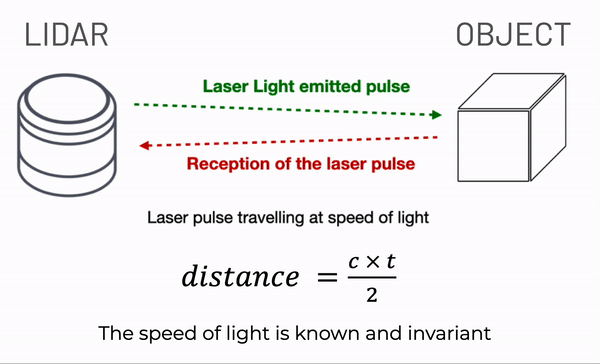

In [32]:
Image("C:\\Users\\amans\\Downloads\\Laser-pulses-1.gif")

# IMPORTING LIBRARIES 

In [4]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D

# CREATING 3D MESH FROM THE RAW LIDAR DISTANCE DATA

# 3D MAPPING
PLANE WALL REPRESENTED BY BLUE SCATTER POINTS  .
DOOR CO-ORDINATES REPRESENTED BY YELLOW SCATTER POINTS.
(I HAVE TAKEN MORE PERCISION WHILE DATA CALCULATION) .
THUS DENSE MESH FOR DOOR SURFACE.

In [2]:
door_3d = pd.read_csv("C:\\Users\\amans\\Downloads\\door_3d.csv")
plane_wall = pd.read_csv("C:\\Users\\amans\\Downloads\\plane_wall_coordinates.csv")


#Create 3D scatter plot using Plotly Express
fig = px.scatter_3d(door_3d, x='X', y='Y', z='Z', color='Y', symbol='Y', size_max=10, opacity=0.7, labels={'X': 'X Label', 'Y': 'Thickness (Y Label)', 'Z': 'Z Label'})
fig.update_traces(marker=dict(size=10), selector=dict(mode='markers'))

# Add points from plane_wall
fig.add_trace(px.scatter_3d(plane_wall, x='X', y='Y', z='Z', color='Y', symbol='Y', size_max=10, opacity=0.7, labels={'X': 'X Label', 'Y': 'Thickness (Y Label)', 'Z': 'Z Label'}).update_traces(marker=dict(size=5)).data[0])

# Show the plot
fig.show()

# PRECISION CALCULATION FOR DOOR AREA
Corner Faces can be calculated by creating 
very fine mess for the smaller object such 
as door. \
Which enables it to handle more 
precise details. 

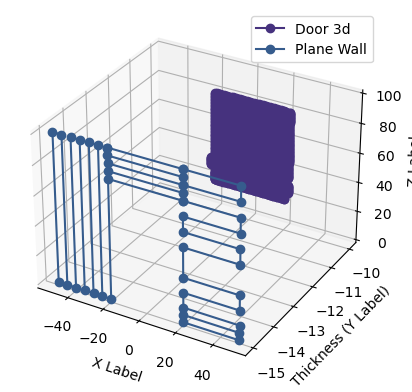

In [16]:
# Plotting the 3D map
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting points from door_data as lines
ax.plot(door_3d['X'], door_3d['Y'], door_3d['Z'], label='Door 3d', marker='o')

# Plotting points from plane_wall as lines
ax.plot(plane_wall['X'], plane_wall['Y'], plane_wall['Z'], label='Plane Wall', marker='o')

# Set axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Thickness (Y Label)')
ax.set_zlabel('Z Label')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [7]:
door_3d = pd.read_csv("C:\\Users\\amans\\Downloads\\door_3d.csv")
plane_wall = pd.read_csv("C:\\Users\\amans\\Downloads\\plane_wall_coordinates.csv")


#Create 3D scatter plot using Plotly Express
fig = px.scatter_3d(door_3d, x='X', y='Y', z='Z', color='Y', symbol='Y', size_max=5, opacity=0.2, labels={'X': 'X Label', 'Y': 'Thickness (Y Label)', 'Z': 'Z Label'})
fig.update_traces(marker=dict(size=10), selector=dict(mode='markers'))

# Add points from plane_wall
fig.add_trace(px.scatter_3d(plane_wall, x='X', y='Y', z='Z', color='Y', symbol='Y', size_max=10, opacity=0.7, labels={'X': 'X Label', 'Y': 'Thickness (Y Label)', 'Z': 'Z Label'}).update_traces(marker=dict(size=5)).data[0])

# Show the plot
fig.show()

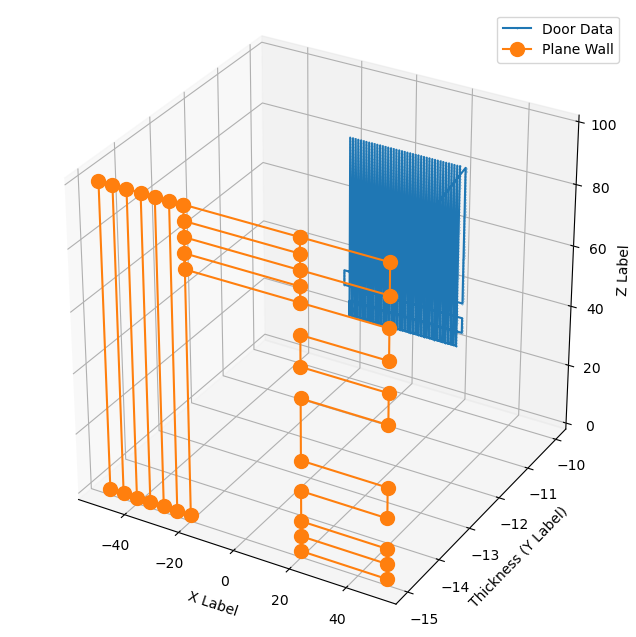

In [8]:
# Plotting the 3D map
fig = plt.figure(figsize=(10, 8))  # Increase the figure size
ax = fig.add_subplot(111, projection='3d')

# Plotting points from door_data as lines with larger markers
ax.plot(door_3d['X'], door_3d['Y'], door_3d['Z'], label='Door Data', marker='o', markersize=0.2)

# Plotting points from plane_wall as lines with larger markers
ax.plot(plane_wall['X'], plane_wall['Y'], plane_wall['Z'], label='Plane Wall', marker='o', markersize=10)

# Set axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Thickness (Y Label)')
ax.set_zlabel('Z Label')


ax.set_box_aspect([1, 1, 1])  # # Adjust aspect ratio for a more accurate representation of the data

# Add a legend
ax.legend()

# Show the plot
plt.show()

#    LABELLINGH DIFFERENT POINTS NEEDS TO BE VISITED

In [12]:
df = pd.read_csv("C:\\Users\\amans\\Downloads\\plane_wall_coordinates.csv")

In [13]:
import plotly.graph_objects as go
from scipy.interpolate import interp1d
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
fig = px.scatter_3d(df, x='X', y='Y', z='Z', color='Z', symbol='Z', size_max=10,
                    title='3D Scatter Plot For Wall Data', labels={'X': 'X Label', 'Y': 'Y Label', 'Z': 'Z Label'})

fig.show()

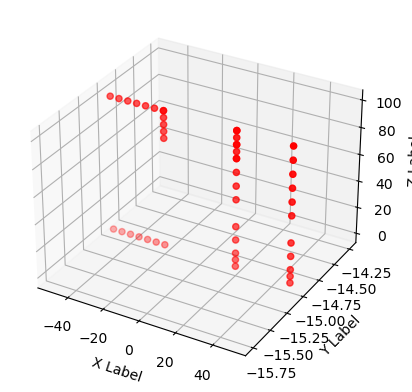

In [14]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points using DataFrame columns
ax.scatter(df['X'], df['Y'], df['Z'], c='r', marker='o')

# Set labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()

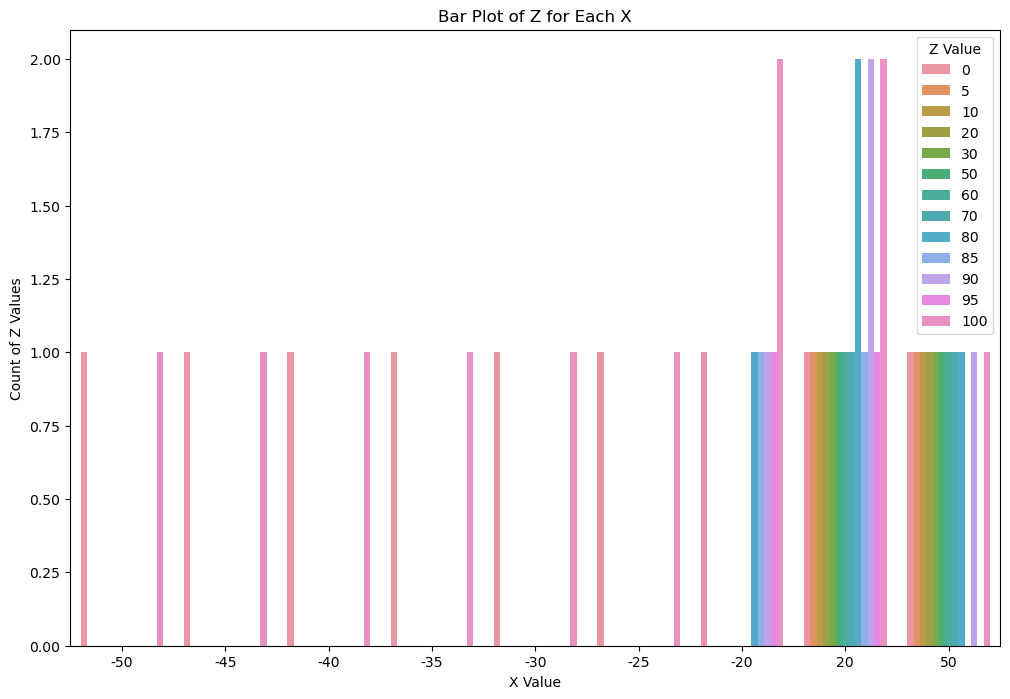

In [15]:
plt.figure(figsize=(12, 8))
sns.set_palette("viridis")  # Set color palette
sns.countplot(data=df, x='X', hue='Z')


plt.xlabel('X Value')
plt.ylabel('Count of Z Values')

plt.legend(title='Z Value')
plt.title('Bar Plot of Z for Each X')
plt.show()

# DATA VISUALIZATION FOR SPECIFIC RANGE

In [17]:

import plotly.graph_objects as go



# Forcibly set the 0th index 'X' value to -50(to visualize your range of values)
df.at[0, 'X'] = -50

# Filter negative values of X
neg_x_df = df[df['X'] < 0]


fig = go.Figure()

# Add scatter plot for negative X
scatter = fig.add_trace(
    go.Scatter3d(
        x=neg_x_df['X'],
        y=neg_x_df['Y'],
        z=neg_x_df['Z'],
        mode='markers',
        marker=dict(size=10, color='blue'),
        name='Scatter Points (Negative X)'
    )
)

# Add red line joining the points
line = fig.add_trace(
    go.Scatter3d(
        x=neg_x_df['X'],
        y=neg_x_df['Y'],
        z=neg_x_df['Z'],
        mode='lines',
        line=dict(color='red', width=4),
        name='Line (Negative X)'
    )
)


fig.update_layout(scene=dict(aspectmode='cube'))
fig.update_layout(scene=dict(xaxis_title='X Value', yaxis_title='Y Value', zaxis_title='Z Value'))
fig.show()


In [18]:


# Forcibly set the 0th index 'X' value to -50
df.at[0, 'X'] = -50
fig = go.Figure()

# Loop through each 'X' value
for x_value in df['X'].unique():
    x_subset = df[df['X'] == x_value]

    # Add scatter plot for current X
    scatter = fig.add_trace(
        go.Scatter3d(
            x=x_subset['X'],
            y=x_subset['Y'],
            z=x_subset['Z'],
            mode='markers',
            marker=dict(size=10, color='blue'),
            name=f'Scatter Points (X={x_value})'
        )
    )

    # Add line joining the points for current X
    line = fig.add_trace(
        go.Scatter3d(
            x=x_subset['X'],
            y=x_subset['Y'],
            z=x_subset['Z'],
            mode='lines',
            line=dict(color='red', width=4),
            name=f'Line (X={x_value})'
        )
    )


fig.update_layout(scene=dict(aspectmode='cube'))
fig.update_layout(scene=dict(xaxis_title='X Value', yaxis_title='Y Value', zaxis_title='Z Value'))
fig.show()


# DATA VISUALIZATION : TRYING TO FIND NEXT CO-RRELATAED POINTS IN THE POSSIBLE DOMAIN (ACCORDING TO CONSTRAINT) 

In [19]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from scipy.interpolate import interp1d

# Forcibly set the 0th index 'X' value to -50
df.at[0, 'X'] = -50

# Create a 3D scatter plot
fig = go.Figure()

# Loop through each 'X' value
for x_value in df['X'].unique():
    x_subset = df[df['X'] == x_value]

    # Add scatter plot for current X
    scatter = fig.add_trace(
        go.Scatter3d(
            x=x_subset['X'],
            y=x_subset['Y'],
            z=x_subset['Z'],
            mode='markers',
            marker=dict(size=10, color='blue'),
            name=f'Scatter Points (X={x_value})'
        )
    )

    # Add line joining the points for current X
    line = fig.add_trace(
        go.Scatter3d(
            x=x_subset['X'],
            y=x_subset['Y'],
            z=x_subset['Z'],
            mode='lines',
            line=dict(color='blue', width=4),
            name=f'Line (X={x_value})'
        )
    )

# Interpolate Z values for each step jump
z_values = np.arange(100, -5, -5)  # Start from 100 and decrease in steps of 5 until 0

# Create interpolated Z values for each X
for x_value in df['X'].unique():
    x_subset = df[df['X'] == x_value]
    interpolated_z = np.interp(np.arange(len(x_subset)), [0, len(x_subset) - 1], [x_subset['Z'].iloc[0], x_subset['Z'].iloc[-1]])

    # Add interpolated Z values to the plot
    fig.add_trace(
        go.Scatter3d(
            x=x_subset['X'],
            y=x_subset['Y'],
            z=interpolated_z,
            mode='markers+lines',
            marker=dict(size=10, color='blue'),
            line=dict(color='blue', width=4),
            name=f'Interpolated Line (X={x_value})'
        )
    )

# Add text labels for each point
for i, row in df.iterrows():
    fig.add_trace(
        go.Scatter3d(
            x=[row['X']],
            y=[row['Y']],
            z=[row['Z']],
            mode='text',
            text=[f'Target{i + 1}'],
            textposition='top center',
            textfont=dict(size=10),
            showlegend=False
        )
    )

fig.update_layout(scene=dict(aspectmode='cube'))
fig.update_layout(scene=dict(xaxis_title='X Value', yaxis_title='Y Value', zaxis_title='Z Value'))
fig.show()


# CREATE WAY POINTS TO NAVIGATE THROUGH THE COLLECTED CO-ORDINATES

In [20]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv("C:\\Users\\amans\\Downloads\\plane_wall_coordinates.csv")

# Forcibly set the 0th index 'X' value to -50
df.at[0, 'X'] = -50

# Create a 3D scatter plot
fig = go.Figure()

# Add scatter plot
scatter = fig.add_trace(
    go.Scatter3d(
        x=df['X'],
        y=df['Y'],
        z=df['Z'],
        mode='markers',
        marker=dict(size=2, color='blue'),
        name='Scatter Points'
    )
)

# Add arrows
arrows = []
for i in range(len(df) - 1):
    arrow = go.Cone(
        x=[df['X'][i]],
        y=[df['Y'][i]],
        z=[df['Z'][i]],
        u=[df['X'][i + 1] - df['X'][i]],
        v=[df['Y'][i + 1] - df['Y'][i]],
        w=[df['Z'][i + 1] - df['Z'][i]],
        colorscale='greens',
        sizemode='scaled',
        sizeref=0.25, 
        showscale=False
    )
    arrows.append(arrow)

fig.add_traces(arrows)

# Loop through each 'X' value
for x_value in df['X'].unique():
    x_subset = df[df['X'] == x_value]

    # Add scatter plot for current X
    scatter = fig.add_trace(
        go.Scatter3d(
            x=x_subset['X'],
            y=x_subset['Y'],
            z=x_subset['Z'],
            mode='markers',
            marker=dict(size=1, color='red'),
            name=f'Scatter Points (X={x_value})'
        )
    )

    # Add line joining the points for current X
    line = fig.add_trace(
        go.Scatter3d(
            x=x_subset['X'],
            y=x_subset['Y'],
            z=x_subset['Z'],
            mode='lines',
            line=dict(color='red', width=4),
            name=f'Line (X={x_value})'
        )
    )

fig.update_layout(scene=dict(aspectmode='cube'))
fig.update_layout(scene=dict(xaxis_title='X Value', yaxis_title='Y Value', zaxis_title='Z Value'))
fig.show()


In [21]:
fig = px.scatter_3d(door_3d, x='X', y='Y', z='Z', color='Y', symbol='Y', size_max=10,
                    opacity=0.7, labels={'X': 'X Label', 'Y': 'Thickness (Y Label)', 'Z': 'Z Label'})
fig.update_traces(marker=dict(size=5), selector=dict(mode='markers'))
fig.add_trace(px.scatter_3d(plane_wall, x='X', y='Y', z='Z', color='Y', symbol='Y',
                            size_max=10, opacity=0.7,
                            labels={'X': 'X Label', 'Y': 'Thickness (Y Label)', 'Z': 'Z Label'}).update_traces(marker=dict(size=5)).data[0])
fig.update_layout(scene=dict(zaxis=dict(title=None)))
fig.show()

# 3D VISUALIZATION Plot of X vs Z for Door and Wall

In [22]:
# Create 2D scatter plot using Plotly Express
fig = px.scatter()
fig.add_trace(px.scatter(door_3d, x='X', y='Z', color='Y',
                         labels={'X': 'X Label', 'Y': 'Thickness (Y Label)', 'Z': 'Z Label'}).data[0])
fig.add_trace(px.scatter(plane_wall, x='X', y='Z', color='Y', 
                         labels={'X': 'X Label', 'Y': 'Thickness (Y Label)', 'Z': 'Z Label'}).data[0])


fig.update_layout(title='Scatter Plot of X vs Z for Door and Wall',
                  xaxis_title='X',
                  yaxis_title='Z')
fig.show()

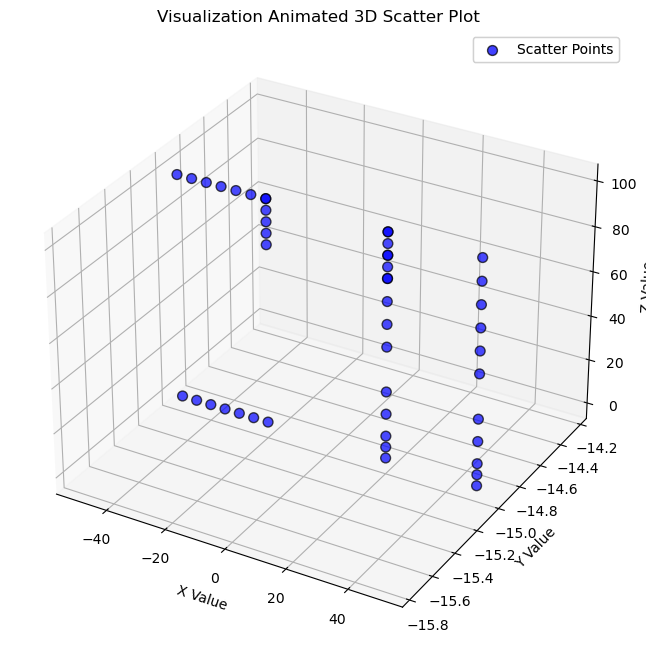

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation



df.at[0, 'X'] = -50
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['X'], df['Y'], df['Z'], s=50, c='blue',
                     edgecolors='black', alpha=0.7, label='Scatter Points')

# Set labels for the axes
ax.set_xlabel('X Value')
ax.set_ylabel('Y Value')
ax.set_zlabel('Z Value')

# Add legend with color titles
legend1 = ax.legend(handles=[scatter], labels=['Scatter Points'])
ax.add_artist(legend1)

# Animation function
def update(frame):
    ax.clear()
    scatter = ax.scatter(df['X'][:frame], df['Y'][:frame], df['Z'][:frame], s=50, c='blue', edgecolors='black', alpha=0.7, label='Scatter Points')
    ax.set_xlabel('X Value')
    ax.set_ylabel('Y Value')
    ax.set_zlabel('Z Value')
    ax.legend(handles=[scatter], labels=['Scatter Points'])

ani = FuncAnimation(fig, update, frames=len(df), interval=500, repeat=False)
plt.title('Visualization Animated 3D Scatter Plot')
plt.grid(True)
plt.show()


# HISTOGRAM PLOT FOR DESIGNED WAY PATH

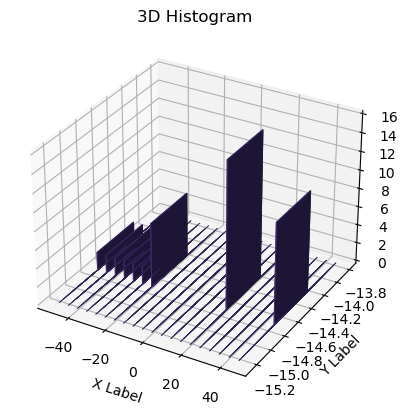

In [24]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

hist, xedges, yedges = np.histogram2d(df['X'], df['Y'], bins=(20, 20))

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.5
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.title('3D Histogram')
plt.show()



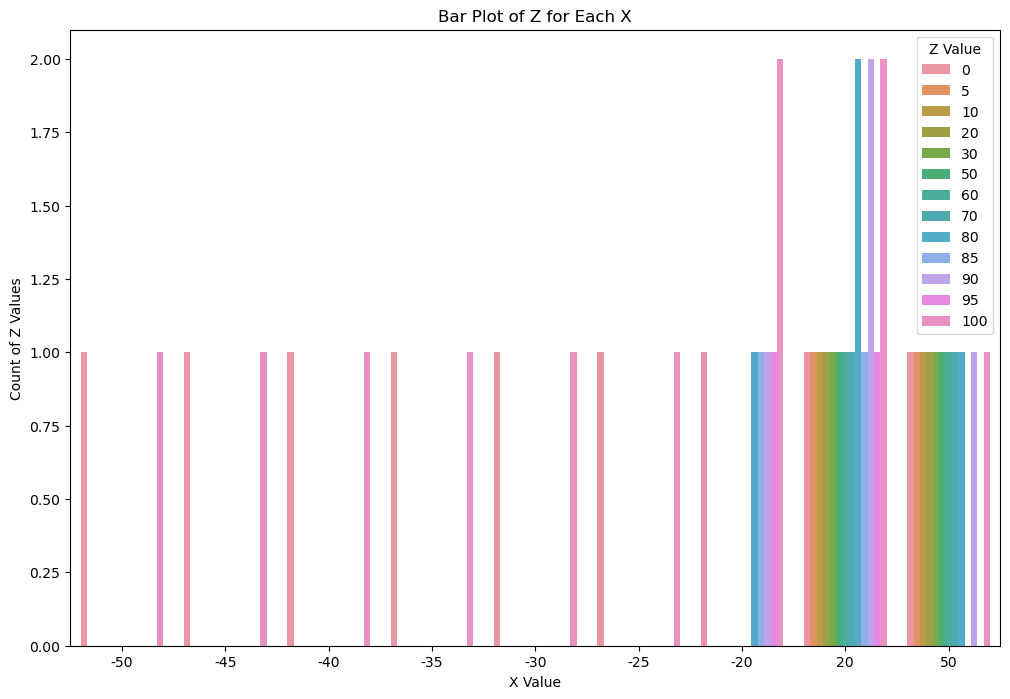

In [25]:
plt.figure(figsize=(12, 8))
sns.set_palette("viridis")  # Set color palette
sns.countplot(data=df, x='X', hue='Z')

# Set labels for the axes
plt.xlabel('X Value')
plt.ylabel('Count of Z Values')

# Add a legend
plt.legend(title='Z Value')

# Show the plot
plt.title('Bar Plot of Z for Each X')
plt.show()

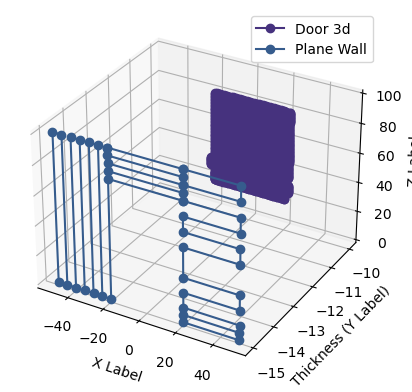

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting points from door_data as lines
ax.plot(door_3d['X'], door_3d['Y'], door_3d['Z'], label='Door 3d', marker='o')

# Plotting points from plane_wall as lines
ax.plot(plane_wall['X'], plane_wall['Y'], plane_wall['Z'], label='Plane Wall', marker='o')

# Set axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Thickness (Y Label)')
ax.set_zlabel('Z Label')
ax.legend()
plt.show()

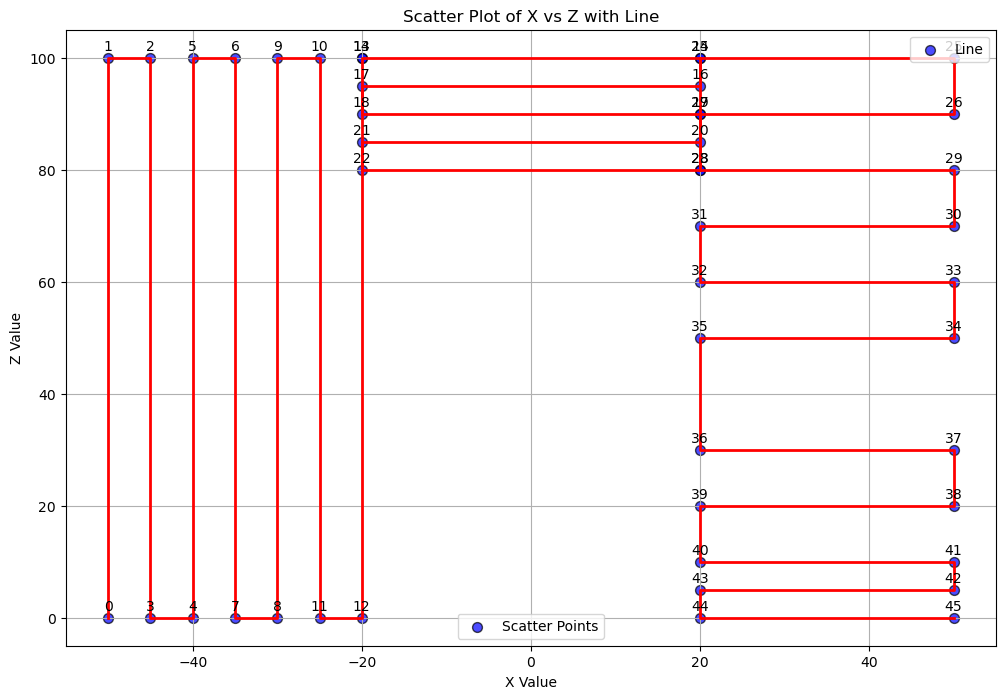

In [27]:

#setting the initial drone -co-ordindates
df.at[0, 'X'] = -50

# Create a scatter plot of X vs Z with larger blue points
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['X'], df['Z'], s=50, c='blue', edgecolors='black', alpha=0.7, label='Scatter Points')

# Annotate each point with its number
for i, txt in enumerate(df.index):
    plt.annotate(txt, (df['X'][i], df['Z'][i]), textcoords="offset points", xytext=(0,5), ha='center')

# Create a red thick line connecting the points
plt.plot(df['X'], df['Z'], color='red', linewidth=2, label='Line')

# Set labels for the axes
plt.xlabel('X Value')
plt.ylabel('Z Value')
legend1 = plt.legend(handles=[scatter], labels=['Scatter Points'])
legend2 = plt.legend(['Line'], loc='upper right')
plt.gca().add_artist(legend1)


plt.title('Scatter Plot of X vs Z with Line')
plt.grid(True)
plt.show()


# ENTIRE NAVIGATION PATH TO VISIT THE WALL CO-ORDINATES ONLY

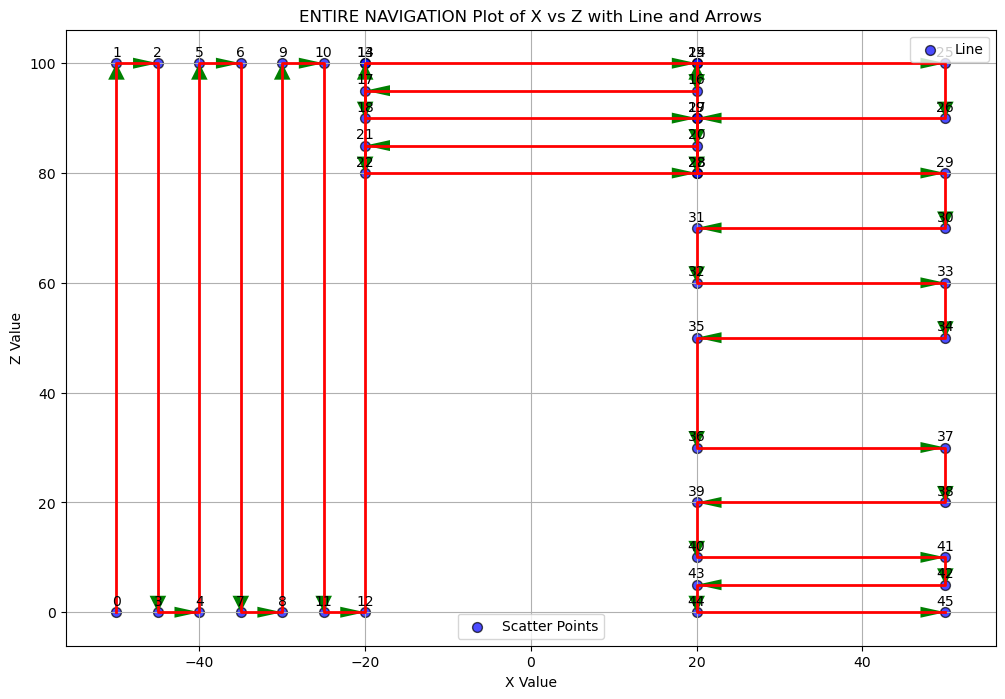

In [28]:


df.at[0, 'X'] = -50

# Create a scatter plot of X vs Z with larger blue points
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['X'], df['Z'], s=50, c='blue', edgecolors='black', alpha=0.7, label='Scatter Points')

for i, txt in enumerate(df.index):
    plt.annotate(txt, (df['X'][i], df['Z'][i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.plot(df['X'], df['Z'], color='red', linewidth=2, label='Line')

for i in range(len(df) - 1):
    plt.arrow(df['X'][i], df['Z'][i], df['X'][i + 1] - df['X'][i], df['Z'][i + 1] - df['Z'][i],
              color='green', shape='full', lw=0, length_includes_head=True, head_width=2)

plt.xlabel('X Value')
plt.ylabel('Z Value')

# Add legend with color titles
legend1 = plt.legend(handles=[scatter], labels=['Scatter Points'])
legend2 = plt.legend(['Line'], loc='upper right')
plt.gca().add_artist(legend1)
plt.title('ENTIRE NAVIGATION Plot of X vs Z with Line and Arrows')
plt.grid(True)
plt.show()


# ACCORDING TO THE ABOVE CO-ORDINATES GENERATED .BELOW CODES MOVE THE OBJECT TO THOSE SPECIFIC CO-ORDINATES ONLY.
TO RUN THE CODE OPEN BLENDER > SCRIPT > COPY AND PASTE THE BELOW CODE IN THE PANEL > SELECT AN OBJECT , USING ADD TOOL > MESH > 
CUBE > LEFT CLICK SELECT THE CUBE > RUN THE CODE ON THE SCRIPT PANEL

# CHANGE THE CAMERA SETTINGS ACCORDING TO YOUR SPECIFIC LOCATION FROM THE BLENDER > CAMERA > OBJECT > EDIT LOCATION  > ORIENTATION > CHANGE FIELD OF VIEW 